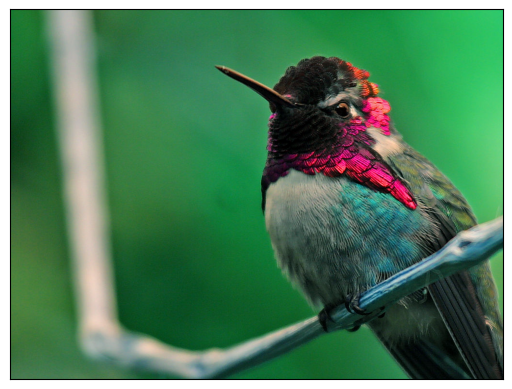

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
origionalImage = cv.imread("/content/Hummingbird.jpg")

#Display Code
plt.imshow(origionalImage)
plt.yticks([])
_ = plt.xticks([])

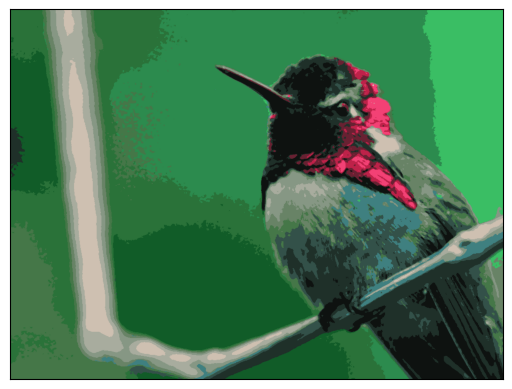

In [ ]:
numColors = 16
blurredImage = cv.medianBlur(origionalImage,5)

flattenedImage = np.float32(blurredImage).reshape((-1,3))
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
_, labels, centers = cv.kmeans(flattenedImage,numColors,None,criteria,10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
flattenedImage = centers[labels.flatten()]
flattenedImage = flattenedImage.reshape(origionalImage.shape)

#Display Code
plt.imshow(flattenedImage)
plt.yticks([])
_ = plt.xticks([])

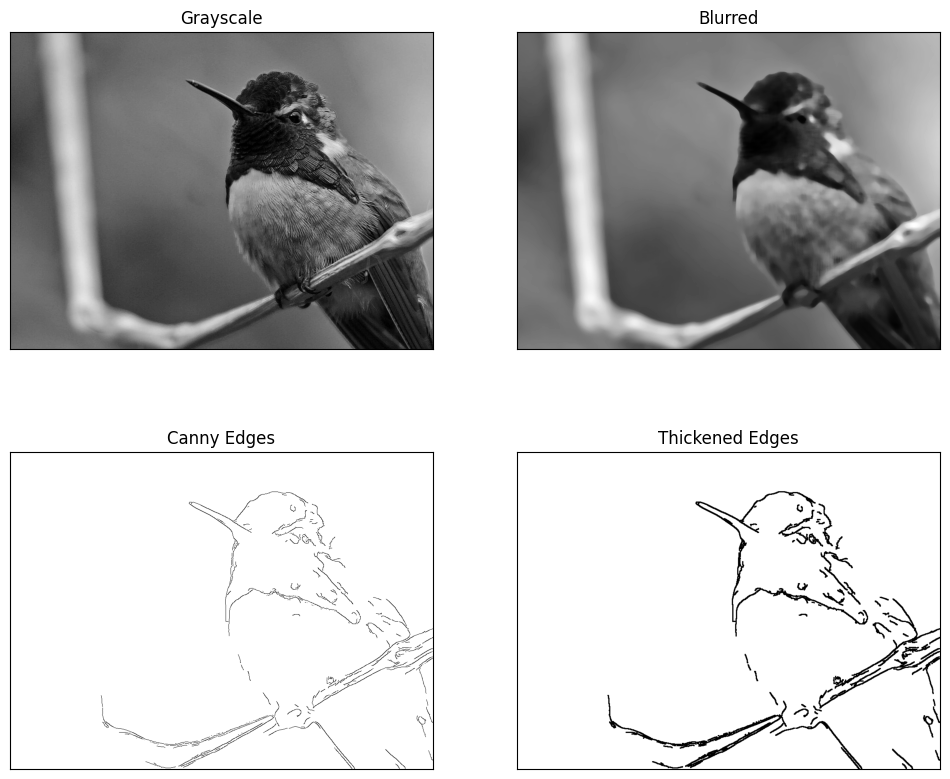

In [ ]:
grayscale = cv.cvtColor(origionalImage,cv.COLOR_BGR2GRAY)
blurred = cv.medianBlur(grayscale,15)
edges = cv.Canny(blurred,50,70)
thin = cv.bitwise_not(edges)
edges = cv.dilate(edges,np.ones((3,3)),iterations=1)
edges = cv.bitwise_not(edges)

#Display Code
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(12)
axes[0][0].imshow(grayscale, cmap="gray")
axes[0][0].set_yticks([])
axes[0][0].set_xticks([])
axes[0][0].set_title("Grayscale")
axes[0][1].imshow(blurred, cmap="gray")
axes[0][1].set_yticks([])
axes[0][1].set_xticks([])
axes[0][1].set_title("Blurred")
axes[1][0].imshow(thin, cmap="gray")
axes[1][0].set_yticks([])
axes[1][0].set_xticks([])
axes[1][0].set_title("Canny Edges")
axes[1][1].imshow(edges, cmap="gray")
axes[1][1].set_yticks([])
axes[1][1].set_xticks([])
_ = axes[1][1].set_title("Thickened Edges")



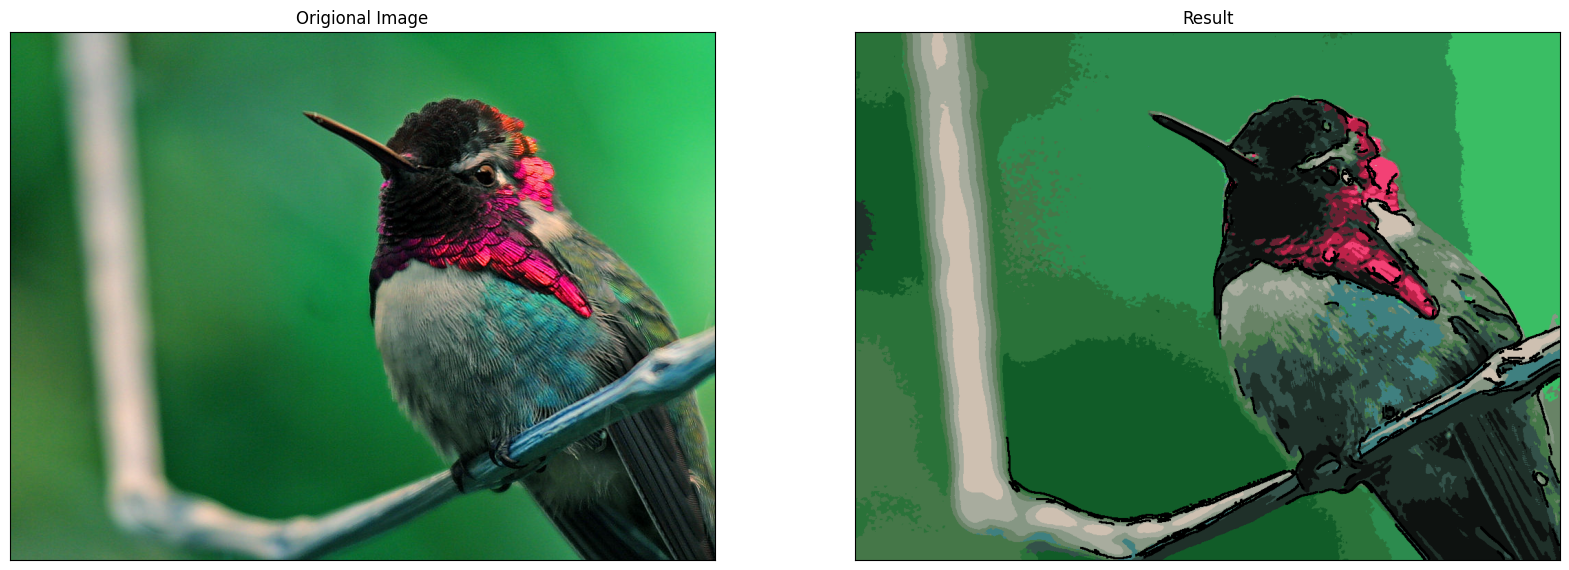

In [ ]:
#combines the flattened and edges
final = cv.bitwise_and(flattenedImage,flattenedImage,mask= edges)

#Display code
fig, axes = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
axes[0].imshow(origionalImage)
axes[0].set_yticks([])
axes[0].set_xticks([])
axes[0].set_title("Origional Image")
axes[1].imshow(final)
axes[1].set_yticks([])
axes[1].set_xticks([])
_ = axes[1].set_title("Result")